<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [1]</a>'.</span>

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [90]:
from pathlib import Path

import seaborn as sns

sns.set_theme(style="whitegrid")

In [91]:
results_dir = "../data/result"

In [92]:
import glob
import os

result_files = [(os.path.splitext(fn)[0], os.path.join(results_dir, fn)) for fn in
                glob.glob("*.csv", root_dir=results_dir)]

In [93]:
result_files

[('throttled_uniform', '../data/result/throttled_uniform.csv'),
 ('asap', '../data/result/asap.csv'),
 ('throttled_wo_ff', '../data/result/throttled_wo_ff.csv'),
 ('throttled', '../data/result/throttled.csv')]

In [94]:
case, data_file = result_files[0]

In [95]:
import pandas as pd

input_df = pd.read_csv(data_file)

In [96]:
prepared_df = input_df.set_index(["window", "campaign_id"]).unstack(fill_value=0)["spent"].cumsum()

In [97]:
prepared_df

campaign_id,2,3,4,5,6,7,8,9,10
window,,,,,,,,,
40,0,0,0,0,0,0,0,0,1009
41,0,0,0,0,0,0,0,0,2018
42,0,0,0,0,0,0,0,0,3027
43,0,0,0,0,0,0,0,0,4036
44,0,0,0,0,0,0,0,0,5045
...,...,...,...,...,...,...,...,...,...
1435,228228,972942,944826,913630,999517,960053,1007665,998522,982698
1436,230230,972942,945828,913630,999517,960053,1007665,998522,982698
1437,233233,972942,945828,913630,999517,960053,1007665,998522,982698


<AxesSubplot:xlabel='window'>

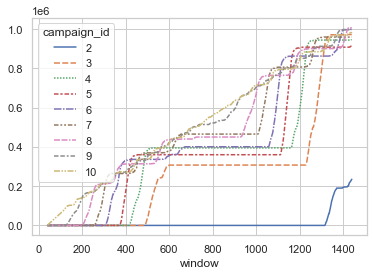

In [98]:
sns.lineplot(data=prepared_df)

In [99]:
campaigns_df = pd.read_csv("../data/input/campaigns.csv", index_col="campaign_id")

In [100]:
campaigns_df

,planned_budget,bid_value
campaign_id,,
1,1001000,1001
2,1002000,1002
3,1003000,1003
4,1004000,1004
5,1005000,1005
6,1006000,1006
7,1007000,1007
8,1008000,1008
9,1009000,1009


In [101]:
normalized_df = prepared_df / campaigns_df["planned_budget"]

In [102]:
normalized_df

campaign_id,1,2,3,4,5,6,7,8,9,10
window,,,,,,,,,,
40,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000999
41,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001998
42,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002997
43,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003996
44,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004995
...,...,...,...,...,...,...,...,...,...,...
1435,NaN,0.227772,0.970032,0.941062,0.909085,0.993556,0.953379,0.999668,0.989615,0.972968
1436,NaN,0.229770,0.970032,0.942060,0.909085,0.993556,0.953379,0.999668,0.989615,0.972968
1437,NaN,0.232767,0.970032,0.942060,0.909085,0.993556,0.953379,0.999668,0.989615,0.972968


<AxesSubplot:xlabel='window'>

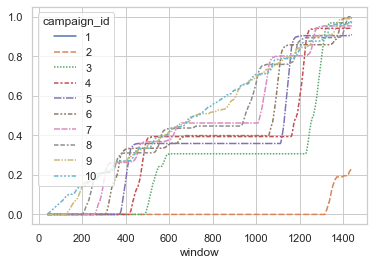

In [103]:
sns.lineplot(data=normalized_df)

../data/result/throttled_uniform.csv
../data/result/asap.csv
../data/result/throttled_wo_ff.csv
../data/result/throttled.csv


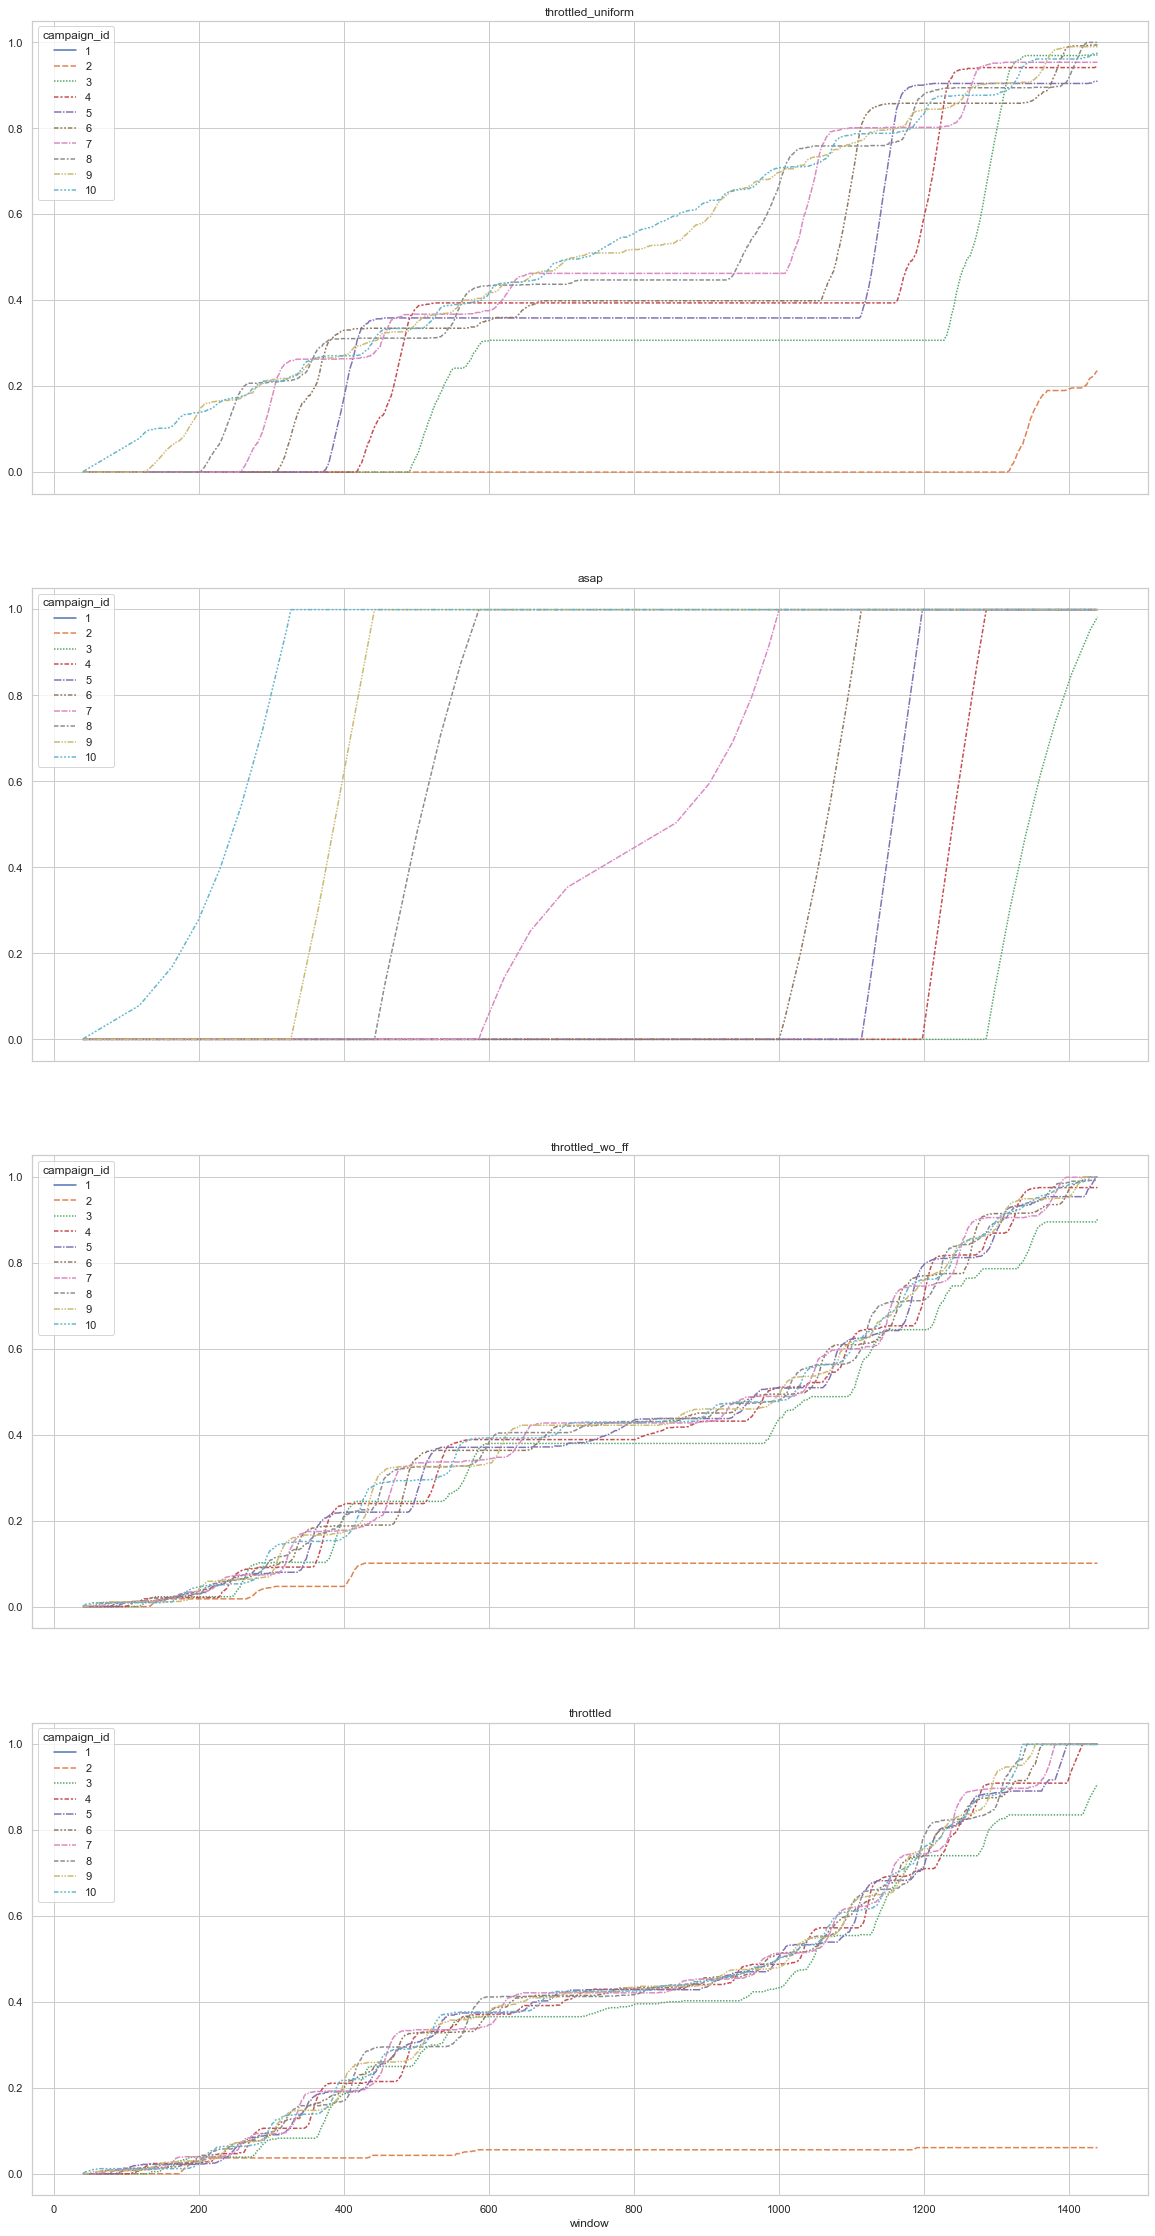

In [104]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(len(result_files), 1, sharex="all", figsize=(20, 10 * len(result_files)))

for ax, res in zip(axs, result_files):
    case, fn = res
    print(fn)
    input_df = pd.read_csv(fn, index_col=["window", "campaign_id"])
    prepared_df = input_df.unstack(fill_value=0)["spent"].cumsum() / campaigns_df["planned_budget"]
    ax.set_title(case)
    sns.lineplot(data=prepared_df, ax=ax)

In [105]:
for case, fn in result_files:
    input_df = pd.read_csv(fn, index_col=["window", "campaign_id"])
    print("records", case, input_df.size)
    print("windows", input_df.groupby(["window", "campaign_id"]).count())

records throttled_uniform 2810
windows                     spent
window campaign_id       
40     10               1
41     10               1
42     10               1
43     10               1
44     10               1
...                   ...
1437   2                1
1438   2                1
       10               1
1439   5                1
       10               1

[2810 rows x 1 columns]
records asap 1404
windows                     spent
window campaign_id       
40     10               1
41     10               1
42     10               1
43     10               1
44     10               1
...                   ...
1435   3                1
1436   3                1
1437   3                1
1438   3                1
1439   3                1

[1404 rows x 1 columns]
records throttled_wo_ff 3574
windows                     spent
window campaign_id       
40     10               1
41     10               1
42     10               1
43     10               1
44     10       